# Relativistische Kinematik

## The Lorentz-Transformation

If we want to change our frame of reference to say that of a relativistically moving particle, like an election inside an an accelerator we need to take into account relativistic effects. This is what the Lorentz-Transform incorporates that the gallilei transform does not. In the case of very small speeds (relative to the speed of light) the Lorentz-Transform can be approximated, with high precision, by the gallilei Transform.

The thing that I did not understand at first and that only dawned on me after trying out a few things is that the Lorenz-transfrom, as the gallilei Transform acts upon coordinate systems, and not on "the universe" so to speak. Let me explain.

To get an intuitive understanding of this let's for a minute designate one reference frame to be THE reference frame. All our information about dimensions and times was measured by equipment that is at rest relative to that reference frame. This is normally called the Laboratory Reference Frame. As part of our lab we have a particle accelerator (every good lab has one laying around nowadays ;)) and now we have particles whizzing through our accelerator. If we now where to imagine ourselves as truly microscopic beings on one of these electorns looking out through a window of the accelerator into our lab (like that window in the accelerator Tony Stark had randomly laying around in his basement (see, every good lab has at least one particle accelerator, the good ones even have windows into the collision chamber so you can see the action ;) )), what would we see?

To answer that question let's take a look at our Lorentz-Transformation and designate the lab frame $L$ and the electron reference frame $E$. To make the math a bit easier at the start let's say that out of sheer coincedence atomic clock in our lab (if you allready have a particle accelerator in your lab you ought to have one of those too) and the imaginary clock on our electron read 0s exactly when the electron moves through the interaction point and the interaction point is designated $\vec{0}$ or the origin of our lab coordinate system $L$ and also perfectly aligns with it. So in short $E$ and $L$ coincide in position and attitude and the time in both reference frames is 0.0000000000000...s . One last thing, the electron is movin in the $\vec{e_z} = \vec{e_z}'$ direction ($\vec{e_z}$ is the unit vector  in z direction and the `'` on the vectors indicate that we are in the $E$ instead of $L$).

In the special case described above the Lorentz-Transform can be defined as:

$$
x=x'\\
y=y'\\
z=\gamma(z'+\beta_zct')\\
ct=\gamma(\beta_zz'+ ct')\\
$$

## Getting a feeling for transformation with the Galilei Transformation
So this transformation relates the basis vectors of the two coordinate systems with each other. Let's take a look at how the galilei transfrorm works to get a feel for the Lorentz-Transform (as I said earlier, the Lorentz-Transform can be approximated by the galilei transform so the general principles of the transformation must be the same)

As simplifying assumption we will assume the same situation as above so the clocks are syncronized and the reference frames $L$ and $E$ coincide in position and attitude at time 0. This time though we will assume that relativistic effects are non existant and the electron is moving with speed $v$ along the $\vec{e_z} = \vec{e_z}'$ axis.

At time $t=t'=0$ the situation looks as follows:

---
<img src="Gallilei_Transform_at_t0.svg" alt="gallilei transform at t=0" width="200">

---
And after some time $t$ the the electron has moved relative to the lab-origin and is now at:

$$
x'=x\\
y'=y\\
z'= z + v\cdot t\\
t' = t
$$

---
<img src="Gallilei-Transform-illustration.svg" alt="gallilei transform after some time" width="300">

---

So if we imagine an object $O$ at the position $\begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}$ in the lab Frame, after the time $t$ that object will haved moved to $\begin{pmatrix} 1\\ 0\\ -v\cdot t \end{pmatrix}$ in the electron reference frame.

If we where to blindly apply our transformation rules to the position of the $O$ we would however get the following position: $\begin{pmatrix} 1\\ 0\\ v\cdot t \end{pmatrix}$
This is not even close to the actual position. This is clear to us because of the intuitive understanding of the galilean transfromation. It get's a bit more tricky when we add in the scale changes introduced by the Lorentz transformation.

As I said, the transformation applies to the Basis vectors of a reference system. If we now want to know what the "world" (aka our Lab system) looks like from the electrons point of view, we need to use the reference system (so position *and scale* of the electron and as our "normal" system and then apply the inverse of the results of the transform into the electron system to figure out how the "world" looks like.

In [1]:
#import the things needed to do the calculations in python
from sympy import *
import numpy as np
from matplotlib import pyplot as plt

First off we look at what that would look like for the galilei transform. As this is a linear transform we can describe the transformation as a matrix $\mathbf{T}$ (for the possible change of basis-vector configuration) with an added vector that accounts for the translational difference between the reference systems.

In [29]:
#define the symbols needed
x, y, z, t, v = symbols('x, y, z, t, v')
#define the matrix that transforms our Lab frame into our electron frame
gt = Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
gt

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

So this matrix tells us, how the basis vectors of the electron reference frame look like when compared to those of the lab reference frame.

There is a massive problem trying to visualize things here, as we don't normally visualize the reference frame (we also can't visualize a changed reference system from within becaus by definition we can only visualize reference systems from an outside perspective, as from within everything that should look right looks right.

---
<img src="transform_of_basis_vectors.svg" alt="the cube is a cube inside both reference frames" width="300"> 

---

So here goes, the previous picture assumes that we are looking at the System $L$ and $E$ from within a eucledian geometry. 

In $L$, which has a euclidian geometry, and all vectors are of equal length that we will arbitrarily call 1 L-meter, and are perpendicular to each other. I said "L-meter" to denote that inside $L$ the length of one of the basis arrows is one meter long, however the scale of the system could be different to our scale.

We are then also looking at $E$ which has a non euclidian reference frame. It is possible to see that the y'-axis is shorter than the one in $L$, it is also at a non-90 degree angle to the x' and z' axis.

Computer games, especially simulators are a good way to think about the concept above. When an artist models an aircraft for example he could request the plans for that vehicle from the manufacurer. Having received the plans they set of and start modeling the aircraft in some modeling software. This software will have some notion of a unit length. So the artist may choose that unit length to be equivalent to one meter in the real world. On their screen this unit lenth may however only be a few centimeters long and on top of that will probably change as the artist goes from modeling structures like the engine pods to modeling switches in the cockpit.

In the example only the scale changed, but it would be similarly possible to change the orientation of basis vectors relative to the rest, distorting the world and everything with it. We as people looking at the screen only notice this because we know what the aircraft should look like (we could look at the plans of the manufacturer and notice that the angles and other geometry looks weird).

Coming back to our matrix we can see from the matrix, that the galilei-transformation does not change the length or angle towards other vectors. This special transform also does not rotate anything (the general galilei transform also includes rotations).

We can easily check that the basis vectors in both systems are identical

In [30]:
# basis vectors in our lab reference frame
e_x = Matrix([1, 0, 0])
e_y = Matrix([0, 1, 0])
e_z = Matrix([0, 0, 1])
# we can check the vectors in L versus E
e_x == gt*e_x

True

In [31]:
e_y == gt*e_y

True

In [32]:
e_z == gt*e_z

True

If we take a look at the transform we can see that we are still missing the translation from the transformation. Translations can't be expressed by matricies as they simply map vectors that start at the same point to other vectors that start at the same point. It can't change the starting point, that's what additions are for (there are tricks for using matricies but we will not consider this here).

So the translational part of this transformation is a vector $\vec{t}$ (this is not a vectorised form of the time variable but the t here stands for "translation") looks like

$$\begin{pmatrix} 0 \\ 0 \\ v\cdot t \end{pmatrix}$$

This leads to the final form of the transforation looking like 

$$\begin{pmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\\\end{pmatrix} \cdot \left(\begin{pmatrix} 0 \\ 0 \\ v\cdot t \end{pmatrix}+\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}\right) = \begin{pmatrix} x_1 \\ x_2 \\ (v\cdot t) + x_3\end{pmatrix}$$

or in more general terms

$$ \vec{x}' = \mathbf{T}\cdot(\vec{t}+\vec{x})$$

where $\vec{x}$ being the vector in the origin reference frame and $\vec{x}'$ being the same vector viewed from the destination reference frame.

In [26]:
tv = Matrix([0, 0, v*t])
tv

Matrix([
[  0],
[  0],
[t*v]])

In [ ]:
x_1, x_2, x_3 = symbols('x_1 x_2 x_3')
xv = Matrix([x_1, x_2, x_3])
xv

In [28]:
_xv = gt*(tv+xv)
_xv

Matrix([
[      x_1],
[      x_2],
[t*v + x_3]])

As we can see, sympy agrees with the aformentioned calculation.

### What are we transforming between reference systems
Now this is the part that took me forever to get into my head. When we look at galilei transform the thing that it does is change the point of view of the world. To accomplish that we figure out how a point in space in our origin reference system corresponds to a point in the destination reference system. If it is possible to do this for a single point, everything that is based upon the concept of a point (essentially all geometric objects are constructed of points (a line is a set of points, as is a sphere and a cube)) can be transformed into the view from the  destination reference frame.

I say view here because I am not changing the thing itself but only how it looks, or in more mathematical terms how it is represented. A vector $\vec{x}$ is the same vector in both reference frames but if it it's components are written out, the value of each component depends on the reference frame that $\vec{x}$ is viewed in.

The question now is what are we transforming when we use the lorentz transformation. If we take a look at how the transfom is defined as, it takes a 4 component vector of which 3 components describe the point in space and the 4th component (or the 0th depending on convention) describes the location in time and spits out a the same type of vector with different component values.

This is obvious, getting an idea of what that means is not quite as intuitive when coming from the galilean transform. When we think of objects, we don't really give them a time coordinate. A specific Car still is that car in 10 years (assuming it does not wear or rust). However to be able to transform something from one reference frame to anothe using the Lorentz transform we need to assign it a point in time. This means that the only thing that can be transformed from one frame to another is an event. Objects (at least in the way we think of them as things in 3D space)can't be described if they are to be transformed using the Lorentz transfrom as they don't have a time coordinate.

We could say: The car is at position $\vec{b}$ at time $t$, but that again corresponds to an event because we have added time information.

So if we can't specify objects so that their representation can be transformed from one reference frame to another then how do we define a length? Or really any geometric object then (they are based on points after all and not on events)?

### Observation is a series of events
The key thing here is that to know something, it has to be measured/observed. As physics does not have any mechanism for action at a distance (at least when we look at modern physics) we have to inferr the things around us by observing the quantities at the location of measurement.

To make this point a bit more understandable intuitively. Yes physics has the concept of fields and magnets seem to attract or repell each other at a distance, and that would conflict with the statement that I made above. If viewed from a quantum mechanical perspective, what happens is that the magnets are actually sending photons back and forth between each other and only when a photon interacts with, say an electron or a proton of one of the magnets the momentum/Energy transported by the photon transfers to the electron or nucleus. To be even more precice, the magnet that you think of as a solid block of metal is in fact made up of unimaginably many electorns an nuclei all emitting photons all the time and some of these photons interact with other electrons and nuclei of the same magnet, pulling and pushing each other around and through a whole bunch of phenomenons decide to clump together into the magnet that you hold in your hand. The transfer of momoentum inside the magnet and from the magnet to your hand then is done by your hand interacting with the photon stream coming from differnt atoms/nuclei/electrons from the magnet that it is holding. This magnet has to transfer more momentum to your hand because it's being bombarded by photons coming from the other magnet. You may wonder why your hand would then interact with the photons coming from the magnet in your hand but not from the magnet further away. This is due to the structure of the magnet which leads to the moments transfered to the magnet being pointed in the same direction, while your hand absorbs photons from the other magnet that transfer momentum into all different directions effectively canceling each other out.

So we have to send out a wave (light in this case) and observe what arrives back at our sensors after a certain time t.
Essentially the only way we can think of objects so that they can be transformed between reference frames is in the way that a Radar would see the them (passive or active, both works, even though you lose time information if you only use passive radar). A Radar sends out a pulse and wait's till it hears a response. It tries to construct a view of it's surroundings by doing that over and over and over. LIDAR (LIght Detection And Ranging) does the same thing with (close to) visible light.
So we are actuelly not transforming an object but events of sending out and receiving phothons. We then have to infer the rest.

So to measure a length l we need to make some assumptions first. The first one is that Space is isotropic when the speed of light is concerned, that means that the speed of light is the same in all directions. See [this very good explanation why this is a fundamental assumption](https://www.youtube.com/watch?=pTn6Ewhb27k). Then, as is the postulate of special and general relativity we need to assume that the speed of light is the same in all reference frames (this is the reason we use the Lorentz transform in the first place). Then we need to assume that photons travel in a straight line (which in all but the most gravitationally disturbed cases it seems to do). With that we measure the time it takes a photon from emission at our sensor (the RADAR emitts a pulse) to the photon being received back at our sensor (the RADAR measures the pulse it sent earlier), divide by two and have the length of our object (or more precicely the distance to whatever reflected our photons). Length (ormore precicely distance to something) is **defined** by this procedure.

In [44]:
x, y, z, t = symbols('x, y, z, t')
_x, _y, _z, _t = symbols("x', y', z', t'")
beta, gamma = symbols('beta_z, gamma')
v_z, c = symbols('v_z, c')

In [45]:
# ausdruecke fuer die relativistischen Faktoren
# die ausdruecke fuer c und z. Diese Datenstruktur ist effektiv eine Formelsammlung
formulars = {beta: v_z/c, gamma:1/(sqrt(1-beta**2)), t:(gamma/c)*(beta*_z+c*_t), z:gamma*(_z+beta*c*_t)}

Lorentz Transformationen sind linear und koennen durch Tensoren, genauer gesagt durch gemischte Tensoren zweiter Stufe dargestellt werden. Gemischte Tensoren zweiter stufe wiederum lassen sich als Quadratische Matrizen schreiben.
Eine Lorentz-Transformation fuer ein mit der Geschwindigkeit $v_z$ in z-Richtung relativ bewegtes Bezugssystem laesst sich schreiben als:

In [46]:
L_z = Matrix([[gamma, 0, 0, beta*gamma], [0, 1, 0, 0], [0, 0, 1, 0], [beta*gamma, 0, 0, gamma]])
L_z

Matrix([
[       gamma, 0, 0, beta_z*gamma],
[           0, 1, 0,            0],
[           0, 0, 1,            0],
[beta_z*gamma, 0, 0,        gamma]])

In [55]:
_v = Matrix([c*_t, _x, _y, _z])
L_z*_v

Matrix([
[beta_z*gamma*z' + c*gamma*t'],
[                          x'],
[                          y'],
[beta_z*c*gamma*t' + gamma*z']])

In [56]:
# Die formel fuer die Transformation von S' nach S laesst sich mit dem Inversen der Matrix berechnen
vec = Matrix([c*t, x, y, z])
L_z.inv().applyfunc(lambda x: x.simplify().subs(1-beta**2, 1/gamma**2))*vec

Matrix([
[-beta_z*gamma*z + c*gamma*t],
[                          x],
[                          y],
[-beta_z*c*gamma*t + gamma*z]])

In [57]:
L_z.det().subs(gamma**2, 1/(1-beta**2)).simplify()

1

In [58]:
(L_z*_v)[0].factor()

gamma*(beta_z*z' + c*t')

In [59]:
(L_z*_v)[3].factor()

gamma*(beta_z*c*t' + z')

In [62]:
(L_z*_v)[3].factor() == formulars[z].factor()

True

In [64]:
(L_z*_v)[0].factor() == c*formulars[t].factor()

True

Dies wird auch von sympy bestaetigt. `formulars` gibt in diesem kontext unse "Formelsammlung" an. In dieser koennen wir nachschlagen was fuer ein Ausdruck fur ein bestimmtes symbol definiert wird. Die verwendete datenstruktur ist ein "dictionary" also ein digitales pendent zu einem Nachschlagewerk, nur das wir hier nicht von hand muehsam nachgucken muessen. Praktisch ist auch, dass damit sympy auch subsittutionen durchfuehren kann. Ist alles in der Formelsammlung von einigen wenigen (vielleicht sogar messbaren groessen) abgeleitet, kann man jeden ausdruck relativ einfach mit hilfe dieser Formelsammlung durch rekursives einsetzen der enthaltenen formeln auf eben jene variablen reduzieren, wobei der urspruenglich ausdruck wahrscheinlich an komplexitaet gewinnt.

Das erweitern wird hier wohl relativ einfach machbar sein. Das reduzieren, also das geschickte umstellen der Terme, sodass die in der Formelsammlung enthaltenen Formeln zum vereinfachen (also zum abstrahieren) verwendet werden koennen wird wohl weiterhin etwas eigenen Hirnschmalz erfordern.

Das Problem an der Verwendung von "Formelsammlungen" ist, dass fuer jedes Symbol eigens eine Formel angegeben werden muss, das heisst, dass es nicht einfach moeglich ist die oben gemachte transformation fuer ein $z_1$ anzugeben, da $z_1$ fuer den computer mit $z$ nichts zu tun hat. Man muss fuer das symbol daher alle formeln "nochmal" implementieren. Es fehlt aktuell noch an einer moeglichkeit, zu sagen das symbole ein gemeinsames transformaitonsverhalten haben. (Zumindest kann ich das dazu passende feature noch nicht finden).

## Laengenkontraktion
Einer der zwei zentralen Effekte der spetiellen relativitaetstheorie ist die Laengenkontraktion. Diese soll hier nun gezeigt werden wobei die yz ebene betrachtet wird.

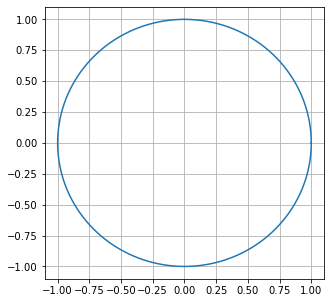

In [18]:
# ein Kreis um den Ursprung im Laborsystem
# c is the parameter of the function that will draw the circle
d = np.linspace(0, 2*np.pi, 10000)
# remember the pyhton variables are allready bound to the symbols y and z
y_coord = np.sin(d)
z_coord = np.cos(d)
fig = plt.figure(figsize=(5,5))
plt.plot(z_coord, y_coord)
plt.grid()

Nun werden die Punkte auf dem Kreis in das bewegte bezugssystem transformiert, dazu muss allerdings zunaechst v in die Matrix eingesetzt werden (also $gamma$ und $beta$ muessen durch den entsprechenden Ausdruck mit $\frac{v}{c}$ ersetzt werden und dann kann fuer die Koordinaten $x=t=0$ und fuer $y=$`y_coord` und $z=$`z_coord` eingesetzt werden. 

In [19]:
# damit die matrix effizient umgeformt werden kann muss erst eine kleine Funktion geschrieben werden
def substitute_in_matrix(matrix, substitutions, i, j):
    expr = matrix[i,j]
    for sym, sub_expr in zip(substitutions.keys(), substitutions.values()):
        expr = expr.subs(sym, sub_expr)
    return expr
# die funktion wird vom matrix konstruktor nur mit i und j als parameter aufgerufen und muss daher in einer lambda
# expression eingepackt werden
substitute_to_v = lambda i, j: substitute_in_matrix(L_z, {gamma:formulars[gamma], beta:formulars[beta]}, i, j)

In [20]:
# zunaechst wird die Matrix nach v/c umgestellt
L_z_reformulated = L_z.applyfunc(lambda x: x.subs(gamma, formulars[gamma]).subs(beta, formulars[beta]))
L_z_reformulated

Matrix([
[1, 0,                             0,                             0],
[0, 1,                             0,                             0],
[0, 0,       1/sqrt(1 - v_z**2/c**2), v_z/(c*sqrt(1 - v_z**2/c**2))],
[0, 0, v_z/(c*sqrt(1 - v_z**2/c**2)),       1/sqrt(1 - v_z**2/c**2)]])

In [21]:
# nun muss noch c und v_z ein wert zugewiesen werden und wir koennen die koordinaten transformieren, wir verwenden
# dafuer wieder den substitutionsmechanismus den wir oben verwendet haben
speed_of_light = 300000000
fraction_of_c = 0.8
eval_L_z = L_z_reformulated.applyfunc(lambda x: x.subs(v_z, fraction_of_c*speed_of_light))
eval_L_z = eval_L_z.applyfunc(lambda x: x.subs(c, speed_of_light))
eval_L_z

Matrix([
[1, 0,                0,                0],
[0, 1,                0,                0],
[0, 0, 1.66666666666667, 1.33333333333333],
[0, 0, 1.33333333333333, 1.66666666666667]])

In [22]:
# nun wenden wir die Transformation an und kriegen den Kreis im relativ bewegten bezugssystem S'
y_coord_transformed = [(eval_L_z*Matrix([0, y_coord[i], z_coord[i], 0])).row(1)[0] for i in range(len(y_coord))]
z_coord_transformed = [(eval_L_z*Matrix([0, y_coord[i], z_coord[i], 0])).row(2)[0] for i in range(len(y_coord))]

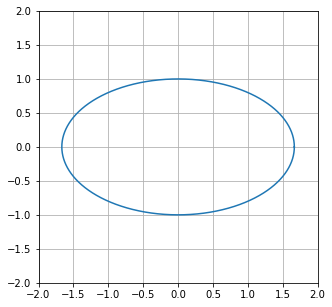

In [23]:
fig = plt.figure(figsize=(5,5))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(z_coord_transformed, y_coord_transformed)
plt.grid()